In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [6]:
Image_size = 256
Batch_size = 32
Channels = 3
Epochs = 50

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plant_Village",
    shuffle = True,
    image_size = (Image_size,Image_size),
    batch_size = Batch_size
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
print(class_names)
print(len(dataset))

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
68


(32, 256, 256, 3)
[2 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 2 0 1 1 0 1 0 1 0 0 1 0 0 0]


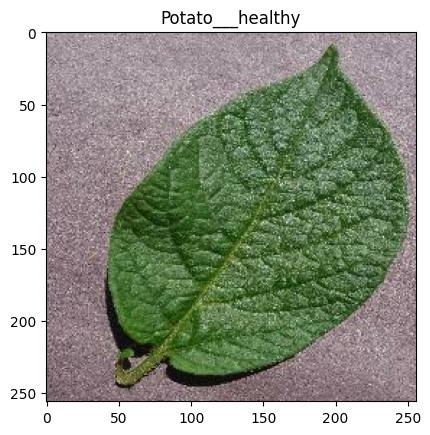

In [24]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

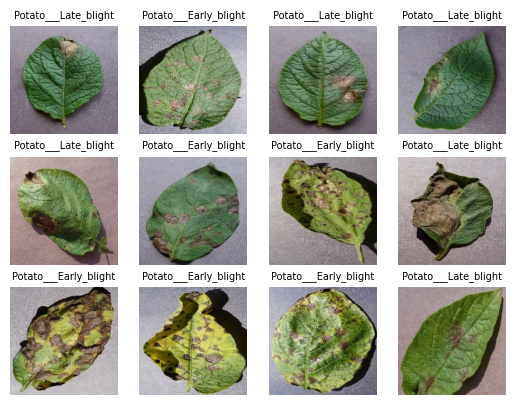

In [35]:
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]],fontsize=7)
        plt.axis("off")

In [36]:
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [46]:
def get_dataset_partition(ds,shuffle=True,shuffle_size=10000):
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=42)
    train_size = 0.8
    ds_size = len(ds)
    train_ds = ds.take(int(train_size*ds_size))
    val_size = 0.1
    test_val_ds = ds.skip(int(train_size*ds_size))
    val_ds = test_val_ds.take(int(ds_size*val_size))
    test_ds = test_val_ds.skip(int(ds_size*val_size))
    return train_ds,val_ds,test_ds

In [47]:
train_ds,val_ds,test_ds=get_dataset_partition(dataset)

In [48]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [49]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [60]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_aond_vertical"),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [69]:
input_shape = (Image_size,Image_size,Channels)
n_classes = 3
model = models.Sequential([
    layers.Conv2D(16,(3,3),input_shape=input_shape,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(8,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [70]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [71]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [72]:
history = model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=Batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 72s 1s/step - loss: 4.6193 - accuracy: 0.5786 - val_loss: 0.5947 - val_accuracy: 0.7917
Epoch 2/50
54/54 [==============================] - 58s 1s/step - loss: 0.5590 - accuracy: 0.8251 - val_loss: 0.4507 - val_accuracy: 0.8385
Epoch 3/50
54/54 [==============================] - 61s 1s/step - loss: 0.4287 - accuracy: 0.8662 - val_loss: 0.3276 - val_accuracy: 0.9010
Epoch 4/50
54/54 [==============================] - 60s 1s/step - loss: 0.2570 - accuracy: 0.9008 - val_loss: 0.2176 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 59s 1s/step - loss: 0.2102 - accuracy: 0.9061 - val_loss: 0.2919 - val_accuracy: 0.8750
Epoch 6/50
54/54 [==============================] - 58s 1s/step - loss: 0.1677 - accuracy: 0.9308 - val_loss: 0.1254 - val_accuracy: 0.9740
Epoch 7/50
54/54 [==============================] - 58s 1s/step - loss: 0.0721 - accuracy: 0.9777 - val_loss: 0.2009 - val_accuracy: 0.9688
Epoch 8/50
54/54 [==

In [73]:
model.evaluate(test_ds)

8/8 [==============================] - 3s 140ms/step - loss: 0.0579 - accuracy: 0.9922


[0.05788750946521759, 0.9921875]

In [79]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [81]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [86]:
len(history.history['accuracy'])
ac = history.history['accuracy']
vc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

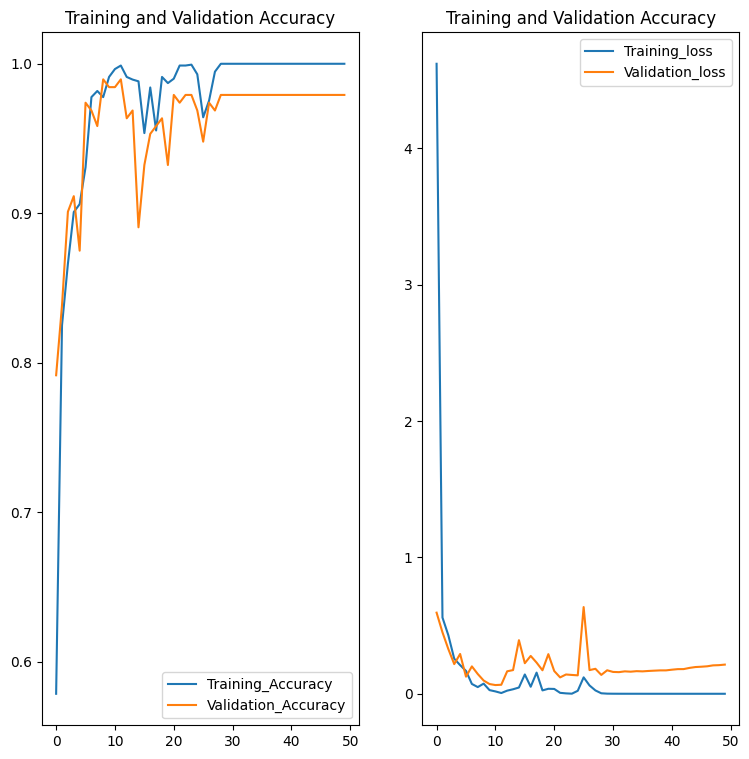

In [103]:
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.plot(range(Epochs),ac,label="Training_Accuracy")
plt.plot(range(Epochs),vc,label="Validation_Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label="Training_loss")
plt.plot(range(Epochs),val_loss,label="Validation_loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")
plt.show()

The Actual label is : Potato___Late_blight
1/1 [==============================] - 0s 201ms/step
The Predicted label is: Potato___Late_blight


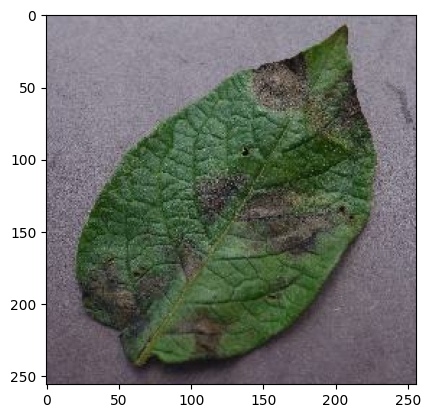

In [109]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    plt.imshow(first_image)
    print(f"The Actual label is : {class_names[first_label]}")
    predicted = model.predict(image_batch)
    print(f"The Predicted label is: {class_names[np.argmax(predicted[0])]}")
    

In [112]:
def predict(model, img):
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 79ms/step


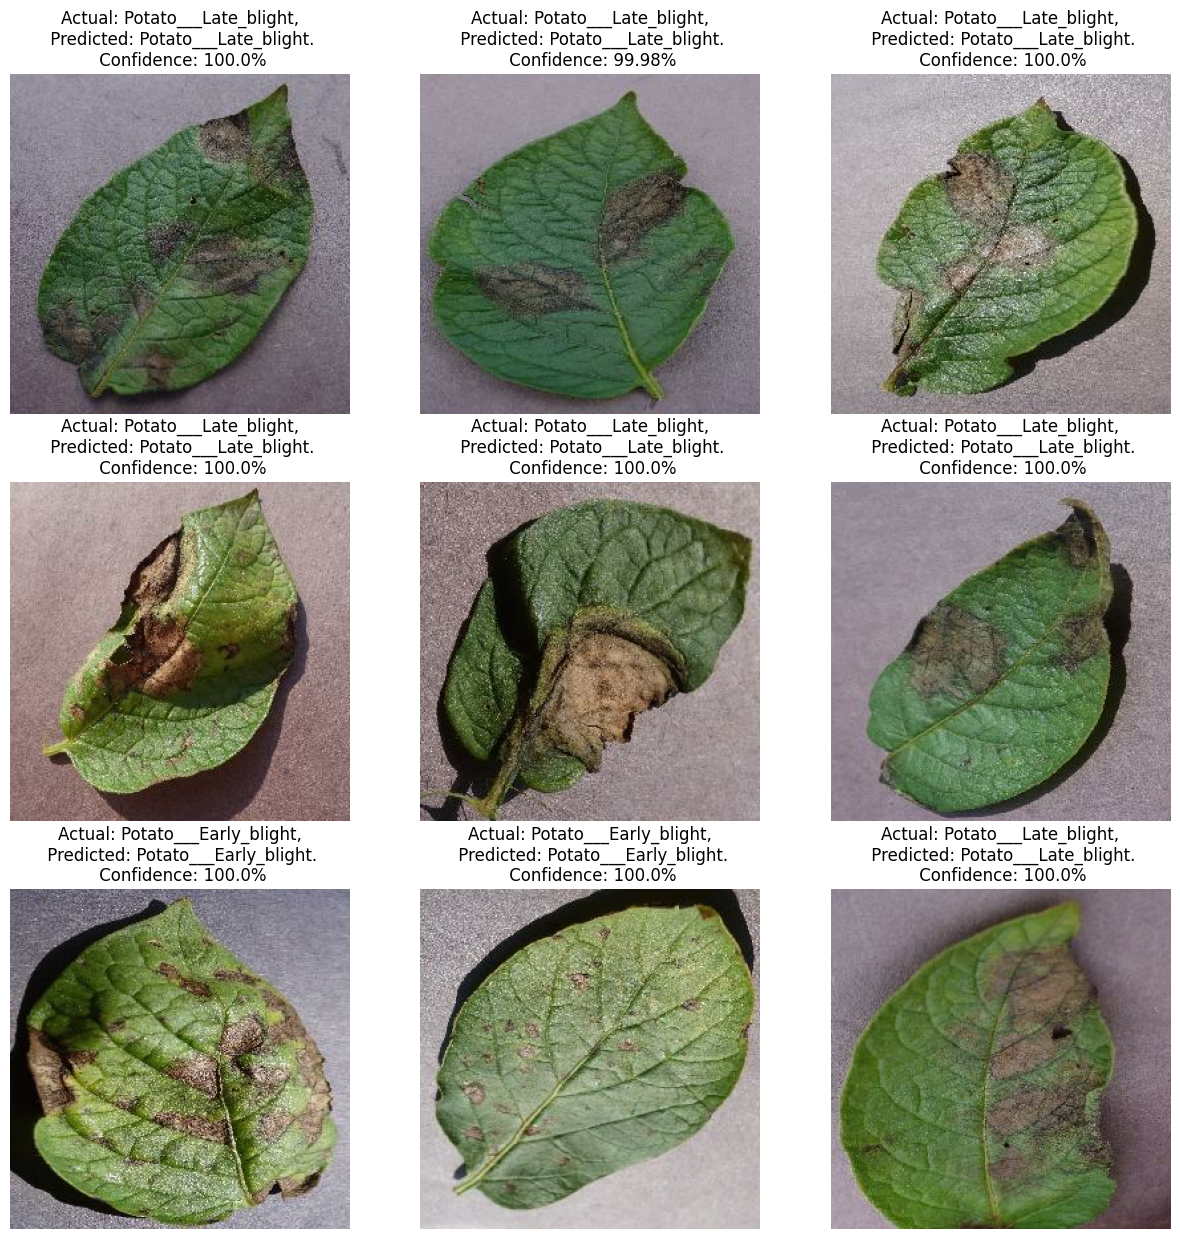

In [113]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [114]:
model_version = 1
model.save(f"../Models/{model_version}")

INFO:tensorflow:Assets written to: ../Models/1\assets


INFO:tensorflow:Assets written to: ../Models/1\assets


In [123]:
import os
model_version = max([int(i) for i in os.listdir(f"../Models/") + [0]])+1
model.save(f"../Models/{model_version}")
model_version

INFO:tensorflow:Assets written to: ../Models/3\assets


INFO:tensorflow:Assets written to: ../Models/3\assets


3